In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./_info.csv')
df = df.dropna()
print('report count:', len(df),', family count:', df['Family'].unique())
df.head(3)

report count: 77 , family count: ['dofloo' 'xorddos' 'Darlloz' 'lupper' 'Gafgyt' 'Luabot' 'Kaiten' 'Turla'
 'BPFDoor' 'Conti' 'ChinaZ' 'Defray777' 'Demonbot' 'EvilGnome'
 'FontOnLake' 'HCRootkit' 'KEYPLUG' 'Lightning' 'Melofee' 'XMRigMiner']


,Family,DocId,Genre,Txtname,Source,Title,objN,objD,objSysN,objSysD,opN,opD,opSysN,opSysD,obj,objSys,op,opSys,numOfSTobj,numOfSTsys
0,dofloo,"D1,1",news,Dofloo-BleepingComputer,bleepingcomputer.com,Exposed Docker APIs Abused by DDoS,0.0,69.0,0.0,10.0,0.0,371.0,0.0,9.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
1,dofloo,"D1,2",news,Dofloo-Securityaffairs,securityaffairs.co,AESDDoS exploits CVE20193396 flaw,8.0,69.0,2.0,10.0,7.0,371.0,3.0,9.0,0.115942,0.2,0.018868,0.115942,4.0,2.0
2,dofloo,"D1,3",analysis,Dofloo-SyscallParty,blog.syscall.party,Analysing the new Linux_AES.DDoS IoT malware,9.0,69.0,2.0,10.0,64.0,371.0,3.0,9.0,0.130435,0.2,0.172507,0.130435,9.0,5.0


In [9]:
df['Family'].value_counts()

BPFDoor       8
Gafgyt        8
Luabot        8
Darlloz       6
xorddos       6
Kaiten        5
dofloo        4
XMRigMiner    4
Turla         4
lupper        4
Conti         3
Defray777     3
KEYPLUG       3
Demonbot      2
FontOnLake    2
Melofee       2
ChinaZ        2
EvilGnome     1
HCRootkit     1
Lightning     1
Name: Family, dtype: int64

In [ ]:
# familys = df['Family'].unique().tolist()
# for fam in familys:
#     df_fam = df[df['Family'] == fam]
#     df_fam = df_fam.groupby(['Genre'])
#     display(df_fam.value_counts())

### Plot Γ_obj 的分布
- 只取 analysis 類型的文件
- 呈現指標的原始分數

mean:0.12, q25:0.036673483299250124, q75:0.17864923747276684
max 5 metric_values: [0.2592592592592592, 0.3076923076923077, 0.3333333333333333, 0.4090909090909091, 0.4090909090909091]
the zero counts document: 5


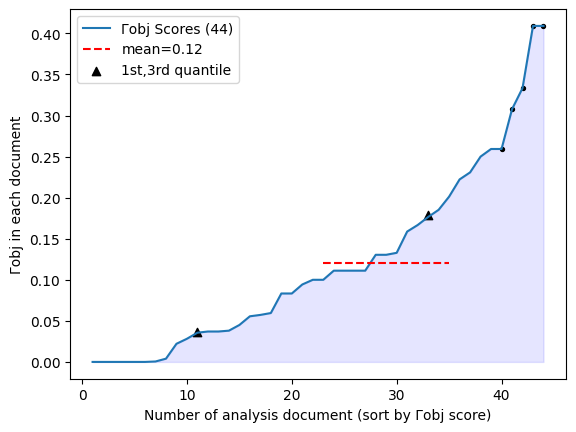

In [4]:
df_analysis = df[df['Genre'] == 'analysis']
metric_values = df_analysis['obj']
metric_values = metric_values.sort_values().to_list()
x_data = list(range(1, len(metric_values)+1))

# https://stackoverflow.com/questions/24988448/how-to-draw-vertical-lines-on-a-given-plot
# https://stackoverflow.com/questions/9834452/how-do-i-make-a-single-legend-for-many-subplots

def last_index_of(number:int, lst:list) -> int:
    ''' return index of last appearance of the number '''
    if number not in lst:
        return -1
    last_index = 0
    for i,v in enumerate(lst):
        if v == number:
            last_index = i
    return last_index
last_index_of(0, [0,0,0,0,1,2,3,4]) # 3
last_index_of(0, [0,0,0,1,2,0,3,4]) # 5

plt.plot(x_data, metric_values, label=f'Γobj Scores ({len(x_data)})')
plt.fill_between(x_data, metric_values, alpha=0.1, color="b") # alpha (opacity)
plt.ylabel('Γobj in each document', color='black') # y label
plt.xlabel('Number of analysis document (sort by Γobj score)') # x label

# 畫出最大的5個點
plt.scatter(x_data[-5:], metric_values[-5:], marker='o', s=8, c='k')

# 平均數, 25&75百分位數
mean_metric = np.mean(metric_values)
q25y, q75y = np.quantile(metric_values, np.array([0.25, 0.75]))
q25x, q75x = len(metric_values)//4, len(metric_values)*3//4
print(f"mean:{mean_metric:.2f}, q25:{q25y}, q75:{q75y}")
print(f"max 5 metric_values: {metric_values[-5:]}")
print("the zero counts document:", last_index_of(0, metric_values))

# plt.vlines(x=zero, ymin=-0.00, ymax=0.25, colors='black', ls='--', label=f'zero counts({zero})')
plt.hlines(y=mean_metric, xmin=23, xmax=35, colors='r', ls='--', label=f'mean={mean_metric:.2f}')
plt.scatter([q25x, q75x], [q25y, q75y], marker='^', c='k', label='1st,3rd quantile')
plt.legend()

- 若將 analysis 的文件分群畫成 bar
- 一個家族是一群，每群選最分數最高的當作「代表」
- 依照「代表」的分數排序群集
- 每個群集的 bar 顏色不相同

In [27]:
len(df_analysis)

44

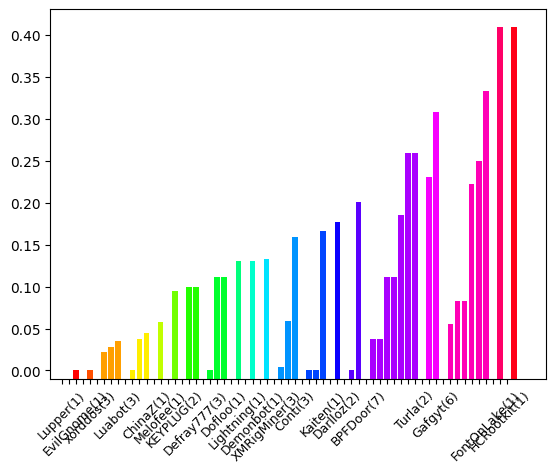

In [67]:
class Cluster:
    def __init__(self, values:list[float], name:str=None) -> None:
        self.values:list[float] = sorted(values)
        self.peak:float = max(self.values)
        if name:
            self.name:str = name
        if name == 'dofloo':
            self.name:str = 'Dofloo'
        if name == 'lupper':
            self.name:str = 'Lupper'
        pass

# c = Cluster([0,1,2,3])
# c.values

def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

family_list = df_analysis['Family'].unique()
cluster_list:list[Cluster] = []
for f in family_list:
    metrics_of_family = df_analysis[df_analysis['Family'] == f]['obj']
    cluster_list.append(Cluster(metrics_of_family, name=f))
cluster_list = sorted(cluster_list, key=lambda x: x.peak, reverse=False)

width = 0.1
start = 1
baseline = -0.01
cmap = get_cmap(len(family_list))
bar_labels = []
y_vals = []
for cid, cluster in enumerate(cluster_list):
    for vid, val in enumerate(cluster.values):
        plt.bar(start, val-baseline, bottom=baseline, color=cmap(cid))
        y_vals.append(val-baseline)
        # print(start, val)
        start += 1
        if vid+1 != len(cluster.values):
            bar_labels.extend([None])
        else:
            bar_labels.extend([cluster.name]) # 在最高點置入家族名稱
    plt.bar(start, baseline, bottom=baseline) # 家族中間的空格
    y_vals.append(baseline)
    start += 1
    bar_labels.extend([None])
ax = plt.gca()
ax.set_ylim([baseline,None])

# 在最高點置入家族名稱，會讓顯示超級不美觀
# for i, v in enumerate(y_vals):
#     if bar_labels[i]:
#         plt.text(i-2, v, str(bar_labels[i]), color='black', size=8)

# 在坐標軸顯示家族名稱較OK
bar_ticks = []
for cid, cluster in enumerate(cluster_list):
    bar_ticks.append(f"{cluster.name}({len(cluster.values)})")
    for vid, val in enumerate(cluster.values):
        bar_ticks.append(None)
plt.xticks(np.arange(len(bar_ticks))-1, bar_ticks, rotation=45, size=9)
# plt.hlines(y=0, xmin=0, xmax=len(bar_ticks), colors='gray', ls='--')
# plt.legend()
plt.show()

### Plot Φ_op 的分布

mean:0.05, q25:0.0, q75:0.0542391706775268
max 5 metric_values: [0.1645569620253164, 0.1725067385444744, 0.2162162162162162, 0.273972602739726, 0.3108108108108108]
the zero counts document: 17


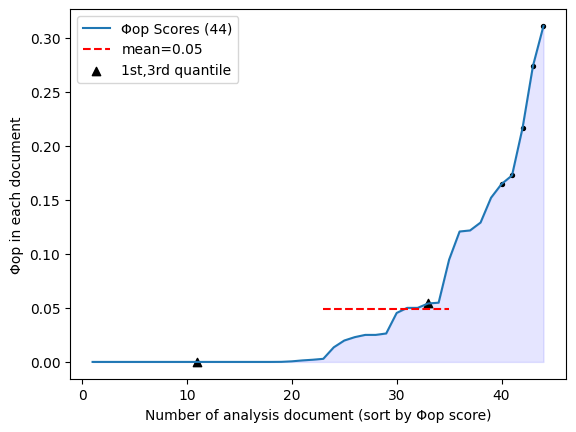

In [5]:
df_analysis = df[df['Genre'] == 'analysis']
metric_values = df_analysis['op']
metric_values = metric_values.sort_values().to_list()
x_data = list(range(1, len(metric_values)+1))

plt.plot(x_data, metric_values, label=f'Φop Scores ({len(x_data)})')
plt.fill_between(x_data, metric_values, alpha=0.1, color="b") # alpha (opacity)
plt.ylabel('Φop in each document', color='black') # y label
plt.xlabel('Number of analysis document (sort by Φop score)') # x label

# 畫出最大的5個點
plt.scatter(x_data[-5:], metric_values[-5:], marker='o', s=8, c='k')

# 平均數, 25&75百分位數
mean_metric = np.mean(metric_values)
q25y, q75y = np.quantile(metric_values, np.array([0.25, 0.75]))
q25x, q75x = len(metric_values)//4, len(metric_values)*3//4
print(f"mean:{mean_metric:.2f}, q25:{q25y}, q75:{q75y}")
print(f"max 5 metric_values: {metric_values[-5:]}")
print("the zero counts document:", last_index_of(0, metric_values))

# plt.vlines(x=zero, ymin=-0.00, ymax=0.25, colors='black', ls='--', label=f'zero counts({zero})')
plt.hlines(y=mean_metric, xmin=23, xmax=35, colors='r', ls='--', label=f'mean={mean_metric:.2f}')
plt.scatter([q25x, q75x], [q25y, q75y], marker='^', c='k', label='1st,3rd quantile')
plt.legend()

### 依照文章類別來看 Γobj, Φop 指標
將其中3個類別獨立出來看 (campaign只有1篇先不畫)

In [23]:
class Cluster:
    def __init__(self, values:list[float], name:str=None) -> None:
        self.values:list[float] = sorted(values)
        self.peak:float = max(self.values)
        if name:
            self.name:str = name.capitalize()
        pass

    def getColor(self):
        if self.name == 'Analysis':
            return 'Green'
        if self.name == 'Tech':
            return 'red'
        if self.name == 'News':
            return 'orange'
        else:
            return 'blue'

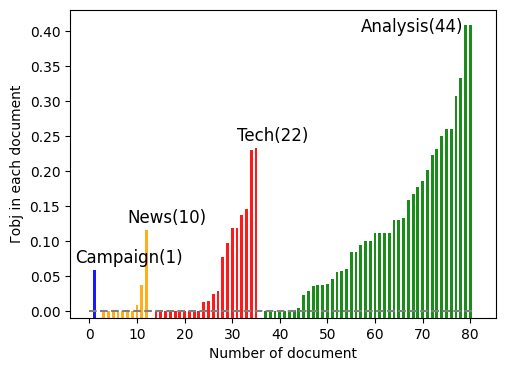

In [55]:
# Γobj
family_list = df['Genre'].unique()
cluster_list:list[Cluster] = []
for f in family_list:
    metrics_of_family = df[df['Genre'] == f]['obj']
    cluster_list.append(Cluster(metrics_of_family, name=f))
cluster_list = sorted(cluster_list, key=lambda x: x.peak, reverse=False)

plt.figure(figsize = (5.5,4))
start = 1
baseline = -0.01
# cmap = get_cmap(len(family_list)*6)
bar_labels = []
y_vals = []
for cid, cluster in enumerate(cluster_list):
    for vid, val in enumerate(cluster.values):
        plt.bar(start, val-baseline, bottom=baseline, color=cluster.getColor(), alpha=0.9, width=0.6)
        y_vals.append(val-baseline)
        # print(start, val)
        start += 1
        if vid+1 != len(cluster.values):
            bar_labels.extend([None])
        else:
            bar_labels.extend([f"{cluster.name}({len(cluster.values)})"]) # 在最高點置入家族名稱
    plt.bar(start, baseline, bottom=baseline) # 家族中間的空格
    y_vals.append(baseline)
    start += 1
    bar_labels.extend([None])
ax = plt.gca()
ax.set_ylim([baseline,None])

# 在最高點置入家族名稱，會讓顯示超級不美觀
for i, v in enumerate(y_vals):
    if bar_labels[i] and bar_labels[i].startswith('Analy'):
        plt.text(i-22, v-0.02, str(bar_labels[i]), color='black', size=12)
        continue
    if bar_labels[i]:
        plt.text(i-3, v, str(bar_labels[i]), color='black', size=12)

# 在坐標軸顯示家族名稱較OK
# bar_ticks = []
# for cid, cluster in enumerate(cluster_list):
#     bar_ticks.append(f"{cluster.name}({len(cluster.values)})")
#     for vid, val in enumerate(cluster.values):
#         bar_ticks.append(None)
# plt.xticks(np.arange(len(bar_ticks))-1, bar_ticks, rotation=45, size=9)
plt.hlines(y=0, xmin=0, xmax=len(bar_ticks), colors='gray', ls='--')
plt.ylabel('Γobj in each document', color='black') # y label
plt.xlabel('Number of document') # x label
# plt.legend()
plt.show()

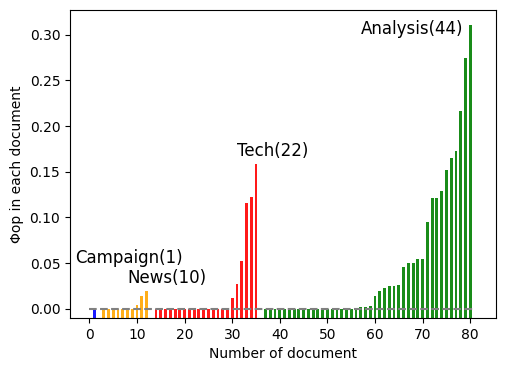

In [60]:
# Φop
family_list = df['Genre'].unique()
cluster_list:list[Cluster] = []
for f in family_list:
    metrics_of_family = df[df['Genre'] == f]['op']
    cluster_list.append(Cluster(metrics_of_family, name=f))
cluster_list = sorted(cluster_list, key=lambda x: x.peak, reverse=False)

plt.figure(figsize = (5.5,4))
start = 1
baseline = -0.01
# cmap = get_cmap(len(family_list)*6)
bar_labels = []
y_vals = []
for cid, cluster in enumerate(cluster_list):
    for vid, val in enumerate(cluster.values):
        plt.bar(start, val-baseline, bottom=baseline, color=cluster.getColor(), alpha=0.9, width=0.6)
        y_vals.append(val-baseline)
        # print(start, val)
        start += 1
        if vid+1 != len(cluster.values):
            bar_labels.extend([None])
        else:
            bar_labels.extend([f"{cluster.name}({len(cluster.values)})"]) # 在最高點置入家族名稱
    plt.bar(start, baseline, bottom=baseline) # 家族中間的空格
    y_vals.append(baseline)
    start += 1
    bar_labels.extend([None])
ax = plt.gca()
ax.set_ylim([baseline,None])

# 在最高點置入家族名稱，會讓顯示超級不美觀
for i, v in enumerate(y_vals):
    if bar_labels[i] and bar_labels[i].startswith('Analy'):
        plt.text(i-22, v-0.02, str(bar_labels[i]), color='black', size=12)
        continue
    if bar_labels[i] and bar_labels[i].startswith('Cam'):
        plt.text(i-3, v+0.04, str(bar_labels[i]), color='black', size=12)
        continue
    if bar_labels[i]:
        plt.text(i-3, v, str(bar_labels[i]), color='black', size=12)

# 在坐標軸顯示家族名稱較OK
# bar_ticks = []
# for cid, cluster in enumerate(cluster_list):
#     bar_ticks.append(f"{cluster.name}({len(cluster.values)})")
#     for vid, val in enumerate(cluster.values):
#         bar_ticks.append(None)
# plt.xticks(np.arange(len(bar_ticks))-1, bar_ticks, rotation=45, size=9)
plt.hlines(y=0, xmin=0, xmax=len(bar_ticks), colors='gray', ls='--')
plt.ylabel('Φop in each document', color='black') # y label
plt.xlabel('Number of document') # x label
# plt.legend()
plt.show()

In [14]:
# 最多 IoC 的分別是: D3,4 D3,5 D2,4 D1,4 D1,3
# df.sort_values(by=['numOfSTobj'], ascending=False).head(5)
df.sort_values(by=['obj'], ascending=False).head(5)

,Family,DocId,Genre,Txtname,Source,Title,objN,objD,objSysN,objSysD,opN,opD,opSysN,opSysD,obj,objSys,op,opSys,numOfSTobj,numOfSTsys
65,FontOnLake,"D15,2",analysis,FontOnLake-eset.wp,eset,Research white papers,9.0,22.0,0.0,0.0,20.0,73.0,1.0,1.0,0.409091,0.0,0.273973,0.409091,9.0,0.0
66,HCRootkit,"D16,1",analysis,HCRootkit-lacework,lacework,Sutersu Linux Rootkit Analysis,9.0,22.0,0.0,0.0,4.0,73.0,1.0,1.0,0.409091,0.0,0.054795,0.409091,6.0,0.0
22,Gafgyt,"D4,4",analysis,Gafgyt-securityscorecard,resources.securityscorecard.com,A Detailed Analysis Of The Gafgyt Malware Tar...,12.0,36.0,0.0,0.0,12.0,79.0,0.0,0.0,0.333333,0.0,0.151899,0.333333,4.0,0.0
42,Turla,"D7,2",analysis,Turla-leonardo,leonardo.com,Malware Technical Insight Turla Penquin_x64,4.0,13.0,0.0,0.0,1.0,20.0,0.0,0.0,0.307692,0.0,0.050000,0.307692,3.0,0.0
51,BPFDoor,"D9,7",analysis,BPFDoor-sandflysecurity,sandflysecurity,An Evasive Linux Backdoor Technical Analysis,7.0,27.0,0.0,0.0,4.0,74.0,0.0,0.0,0.259259,0.0,0.054054,0.259259,11.0,0.0


### 製作統計數據

In [17]:
# Gamma
tmp = df.sort_values(by=['obj'], ascending=False)
a = tmp[['Family', 'DocId', 'Genre', 'obj']].head(5)
a.rename(columns = {'obj':'Γobj'}, inplace = True)
display(a)

# Phi
tmp = df.sort_values(by=['op'], ascending=False)
a = tmp[['Family', 'DocId', 'Genre', 'op']].head(5)
a.rename(columns = {'op':'Φop'}, inplace = True)
display(a)

,Family,DocId,Genre,Γobj
65,FontOnLake,"D15,2",analysis,0.409091
66,HCRootkit,"D16,1",analysis,0.409091
22,Gafgyt,"D4,4",analysis,0.333333
42,Turla,"D7,2",analysis,0.307692
51,BPFDoor,"D9,7",analysis,0.259259


,Family,DocId,Genre,Φop
49,BPFDoor,"D9,5",analysis,0.310811
65,FontOnLake,"D15,2",analysis,0.273973
48,BPFDoor,"D9,4",analysis,0.216216
2,dofloo,"D1,3",analysis,0.172507
23,Gafgyt,"D4,3",analysis,0.164557


In [5]:
df.head(3)

,Family,DocId,Genre,Txtname,Source,Title,objN,objD,objSysN,objSysD,opN,opD,opSysN,opSysD,obj,objSys,op,opSys,numOfSTobj,numOfSTsys
0,dofloo,"D1,1",news,Dofloo-BleepingComputer,bleepingcomputer.com,Exposed Docker APIs Abused by DDoS,0.0,69.0,0.0,10.0,0.0,371.0,0.0,9.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
1,dofloo,"D1,2",news,Dofloo-Securityaffairs,securityaffairs.co,AESDDoS exploits CVE20193396 flaw,8.0,69.0,2.0,10.0,7.0,371.0,3.0,9.0,0.115942,0.2,0.018868,0.115942,4.0,2.0
2,dofloo,"D1,3",analysis,Dofloo-SyscallParty,blog.syscall.party,Analysing the new Linux_AES.DDoS IoT malware,9.0,69.0,2.0,10.0,64.0,371.0,3.0,9.0,0.130435,0.2,0.172507,0.130435,9.0,5.0


In [4]:
# 資策會提供的報告的指標
iii = df[df['Family'].isin([
 'BPFDoor', 'Conti', 'ChinaZ', 'Defray777', 'Demonbot', 'EvilGnome',
 'FontOnLake', 'HCRootkit', 'KEYPLUG', 'Lightning', 'Melofee', 'XMRigMiner',])]
iii = df
# iii['Γobj'] = iii['objN'] / iii['objD']
# iii['Γrsc'] = iii['objSysN'] / iii['objSysD']
# iii['Φop']  = iii['opN'] / iii['opD']
# iii['Φsys'] = iii['opN'] / iii['opD']
iii = iii[['Family', 'DocId', 'obj', 'objSys', 'op', 'opSys']]
iii.rename(columns = {
    'obj':'Γobj',
    'objSys':'Γrsc' ,
    'op': 'Φop',
    'opSys': 'Φsys'
}, inplace = True)
iii.replace(to_replace = 0, value = '', inplace=True)
iii.to_csv('_quality_metrics.csv', index=False)
iii

C:\Users\luweb\AppData\Local\Temp\ipykernel_26540\525076965.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iii.rename(columns = {
C:\Users\luweb\AppData\Local\Temp\ipykernel_26540\525076965.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iii.replace(to_replace = 0, value = '', inplace=True)


,Family,DocId,Γobj,Γrsc,Φop,Φsys
0,dofloo,"D1,1",,,,
1,dofloo,"D1,2",0.115942,0.2,0.018868,0.115942
2,dofloo,"D1,3",0.130435,0.2,0.172507,0.130435
3,dofloo,"D1,4",0.144928,0.6,0.026954,0.144928
4,xorddos,"D2,1",,,,
...,...,...,...,...,...,...
72,Melofee,"D19,2",,,,
78,XMRigMiner,"D21,1",0.059524,,,0.059524
79,XMRigMiner,"D21,2",0.007937,,0.004049,0.007937
80,XMRigMiner,"D21,3",0.15873,,0.026316,0.15873
